<a href="https://colab.research.google.com/github/FulISun/AI_ML-DL_Intermediate/blob/main/sklearn/02_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn을 이용한 결정트리

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

import graphviz
from sklearn.tree import export_graphviz
from imageio import imread

cm2 = ListedColormap(['C1', 'C2'])
cm3 = ListedColormap(['C1', 'C2', 'C3'])

## 개요



*   아래 그림처럼 feature의 임계값을 기준으로 training set의 샘플들을 좌우로 분리하여 나무 형태로 만드는 방법

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_002.png"/>https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

*   모든 분리가 끝나면 leaf node(리프노드)라 불리는 가장 아래쪽 노드의 샘플들을 보고 예측함

*   그림에 첫 분기 왼쪽 주황색 노드에 모인 샘플들은 [50,0,0]으로 1번 클래스가 50개, 나머지 클래스 샘플들은 없으므로 데이터의 세 번째 특성 *X[3]<=0.8* 이면 무조건 첫 번째 클래스로 판별 

# - 결정해야 하는 것

*   어떤 특성으로 분기할지? *X[1], X[2], X[3]*
*   특성이 정해지면 어던 값으로 분기할지?
*   회귀문제인 경우 아래 그림처럼 출력값을 노드에 모인 샘플 타겟의 평균으로 예측하여 해결

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png"/>


## 분류

### 데이터 생성

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

In [ ]:
print(X.shape, y.shape)

(100, 2) (100,)


In [ ]:
print(X[:5])
print()
print(y[:5])

[[ 1.87756309  0.56839425]
 [ 0.36877983 -0.34894509]
 [ 0.96515318  0.10921819]
 [ 0.48599685  0.20291313]
 [ 1.72532644  0.53367598]]

[1 1 0 1 1]


### 데이터 확인

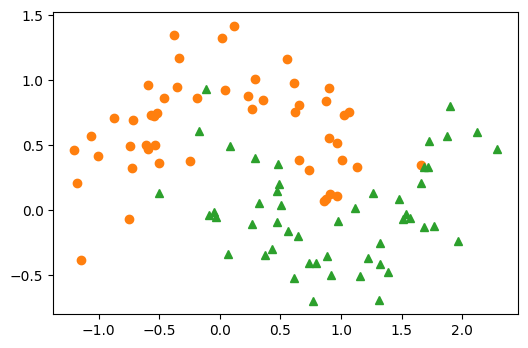

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1') # y=0인 X의 첫 번째 특성을 x축, 두 번째 특성을 y축
ax.plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')

plt.show()

### 학습

In [ ]:
# 모델 로딩
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 모델 생성과 fit
tree = DecisionTreeClassifier(max_depth=1, random_state=0).fit(X,y)

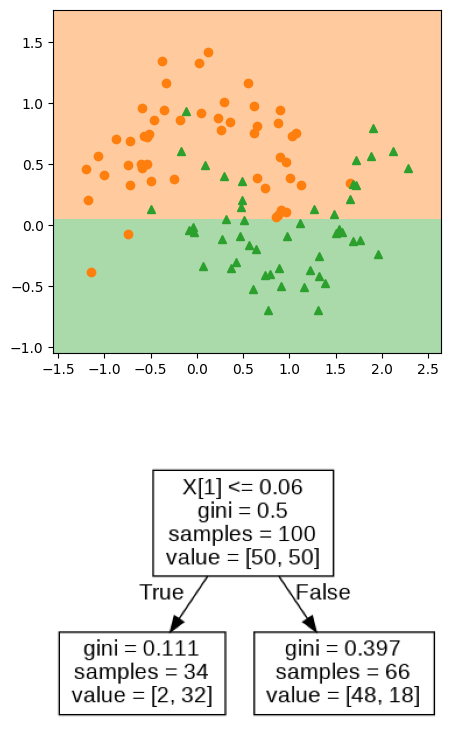

In [ ]:
# 그림으로 확인
eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps # x축 (특성1)
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps # y축 (특성2)
xx = np.linspace(x_min, x_max, 100)
yy = np.linspace(y_min, y_max, 100)
X1, X2 = np.meshgrid(xx, yy) # 격자
X_grid = np.c_[X1.ravel(), X2.ravel()] # 열 합치기

Z = tree.predict(X_grid) # 예측값
Z = Z.reshape(X1.shape)

fig, ax = plt.subplots(figsize=(5,10), nrows=2, ncols=1, dpi=100)

ax[0].plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
ax[0].plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')
ax[0].contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])

ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)

#----------------------------------------------#
# 트리 그림 그리기
dot_data = export_graphviz(tree, out_file=None,
                           max_depth=9, impurity=True)
graph = graphviz.Source(dot_data, format='png')
tree_img = imread(graph.render())
ax[1].imshow(tree_img)
ax[1].axis('off')
#----------------------------------------------#

plt.show()

TRUE는 초록쪽임. 초록 영역에 오렌지 오분류 2개 정분류 32개

### 지니불순도

- $i$번째 노드에서 계산되는 지니불순도Gini impurity

$$
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2
$$

- 위 식에서 $p_{i,k}$는 $i$번째 노드에 있는 샘플 중 클래스 $k$에 속한 샘플의 비율(확률값)

만약에 클래스가 몰빵되면 sigma(p) 부분이 1이 됨

즉, 불순도를 나타내는 G가 0이 됨. 불순하지 않다! 

class는 내가 가진 그룹 수, p는 확률값.

쪼갤지 말지 정하는 기준점이 되는 것이 지니계수 or 엔트로피

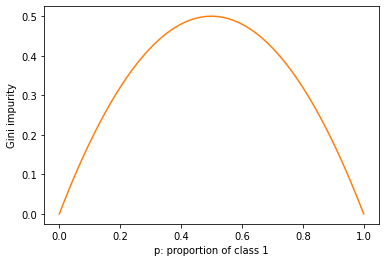

In [ ]:
# 지니 불순도 그래프 확인

fig = plt.figure()
ax = plt.axes()

p = np.linspace(0, 1, 100)
G = 1 - ( p**2 + (1-p)**2 )

ax.plot(p, G, color='C1')
ax.set_xlabel('p: proportion of class 1')
ax.set_ylabel('Gini impurity')

plt.show()

In [ ]:
np.unique(np.array([1,1,2,3,3,4])) # unique값만 보여줌
np.unique(np.array([1,1,2,3,3,4]), return_counts=True) # unique값과 그 값이 몇 개 씩 있는지 보여줌


(array([1, 2, 3, 4]), array([2, 1, 2, 1]))

In [ ]:
cond = X[:,1] <= 0.06
X_left, y_left = X[cond], y[cond]
X_right, y_right = X[~cond], y[~cond]

y_left # 0이 2개, 1이 32개
print(np.unique(y_left, return_counts=True))
print(np.unique(y_left, return_counts=True)[1]) # p0,0 / p0,1
(np.unique(y_left, return_counts=True)[1]/34)**2 

(array([0, 1]), array([ 2, 32]))
[ 2 32]


array([0.00346021, 0.88581315])

In [ ]:
# 지니 불순도 기준 작성
def gini(k, tk, X, y):
    """
    k: 특성의 인데긋
    tk: k번째 특성을 나눌 임계값
    X, y: left, right로 나눌 데이터와 타겟값 
    """

    # split X w.r.t tk
    cond = X[:,k] <= tk # 얘를 기준으로 데이터를 왼쪽, 오른쪽으로 분기 시킴
    X_left, y_left = X[cond], y[cond]
    X_right, y_right = X[~cond], y[~cond]
    
    # calc. gini impurity left node, right node
    G_left = 1 - np.sum(
        (np.unique(y_left, return_counts=True)[1] / y_left.shape[0])**2 # 유니크한 타겟 몇 개인지 
    )
    G_right = 1 - np.sum(
        (np.unique(y_right, return_counts=True)[1] / y_right.shape[0])**2 # 유니크한 타겟 몇 개인지 
    )

    return (G_left, G_right)

In [ ]:
# 확인
G_left, G_right = gini(1, 0.06, X, y)

print(f"Left node gini={G_left:.3f}, Right node gini={G_right:.3f}")

Left node gini=0.111, Right node gini=0.397


### 목적함수

- 지니 불순도를 기준으로 다음 함수의 값이 가장 작아지는 위치에서 분기

$$
J(k, t_k) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}}
$$

- $k$는 특성번호, $t_k$는 특성 $k$의 분기값

쪼갰을 때 한 쪽 노드에 샘플들이 모이기를 바라므로 불순도가 작기를 원하는데, 불순도 두 개를 가중치 줘서 더한 게 목적함수 J이다보니 J를 작게하는 특성(변수)를 고르고 cut-off 값을 정함!

In [ ]:
# 목적함수 작성
def J(k, tk, criterion, X, y):
    
    num_left = np.sum(X[:,k] <= tk)
    num_right = X.shape[0] - num_left

    G_left, G_right = criterion(k, tk, X, y)

    return(num_left/ X.shape[0]*G_left + (num_right/X.shape[0]) *G_right)

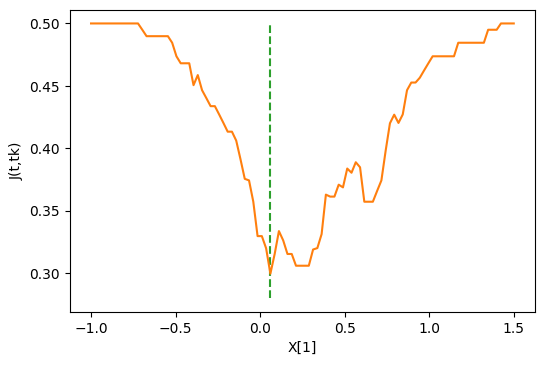

In [ ]:
# 목적함수 그리기

#------------- k=1인 경우의 목적함수 -------------#
T = np.linspace(-1, 1.5, 100)
crit = []

for t in T:
    crit.append(J(1, t, gini, X, y)) # k=1

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(T, crit, color='C1')
ax.vlines(0.06, 0.28, 0.5, linestyles='--', color='C2')

ax.set_xlabel('X[1]')
ax.set_ylabel('J(t,tk)')

plt.show()

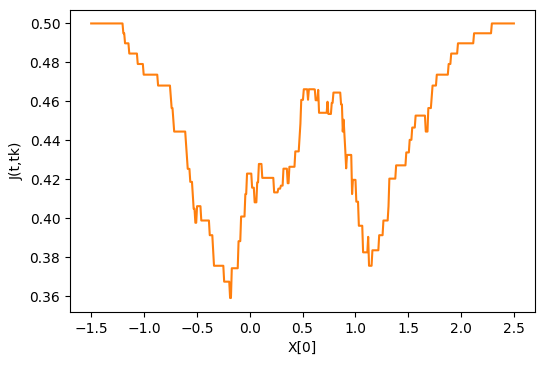

In [ ]:
# 목적함수 그리기

#------------- k=0인 경우의 목적함수 -------------#
T = np.linspace(-1.5, 2.5, 500)
crit = []

for t in T:
    crit.append(J(0, t, gini, X, y)) # k=1

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(T, crit, color='C1')
# ax.vlines(0.06, 0.28, 0.5, linestyles='--', color='C2')

ax.set_xlabel('X[0]')
ax.set_ylabel('J(t,tk)')

plt.show()

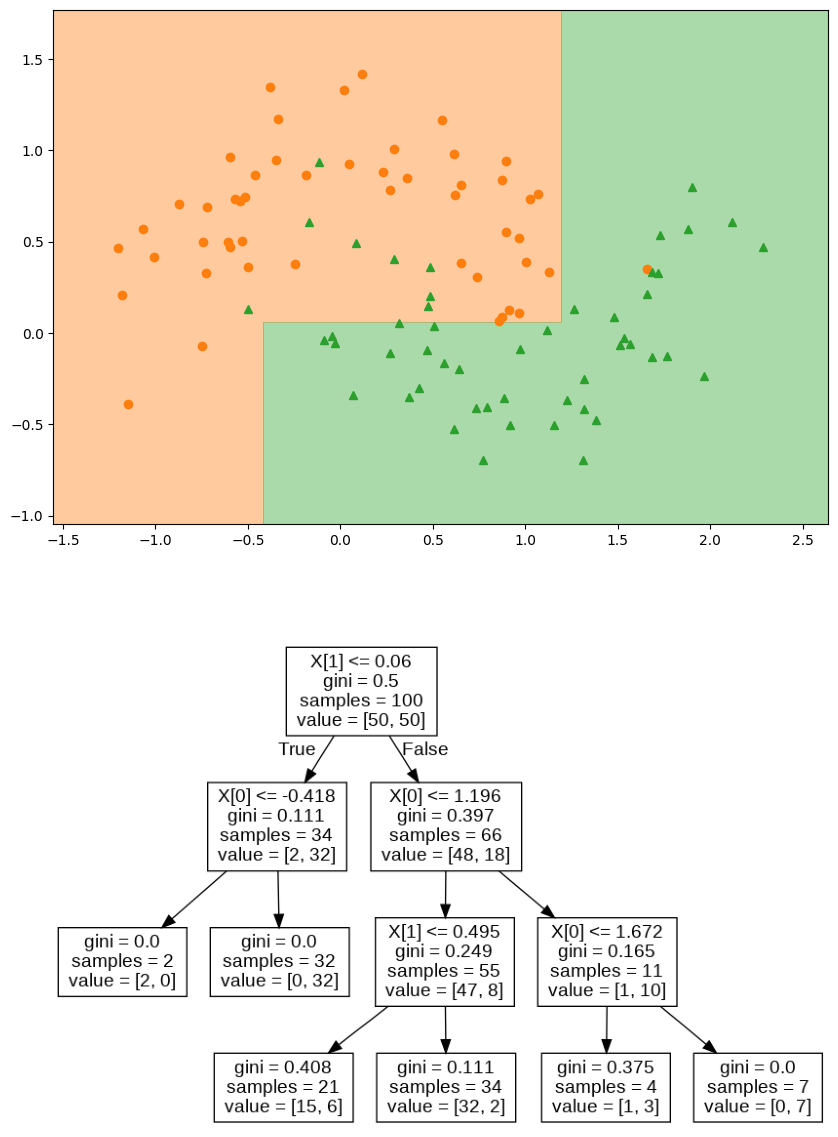

In [ ]:
#----------------------------------#
# 깊이 3으로 fit
tree = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X,y)
#----------------------------------#

# 그림으로 확인 
eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps # x축 (특성1)
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps # y축 (특성2)
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy) # 격자
X_grid = np.c_[X1.ravel(), X2.ravel()] # 열 합치기

Z = tree.predict(X_grid) # 예측값
Z = Z.reshape(X1.shape)

fig, ax = plt.subplots(figsize=(10,15), nrows=2, ncols=1, dpi=100)

ax[0].plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
ax[0].plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')
ax[0].contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])

ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)

#----------------------------------------------#
# 트리 그림 그리기
dot_data = export_graphviz(tree, out_file=None,
                           max_depth=9, impurity=True)
graph = graphviz.Source(dot_data, format='png')
tree_img = imread(graph.render())
ax[1].imshow(tree_img)
ax[1].axis('off')
#----------------------------------------------#

plt.show()

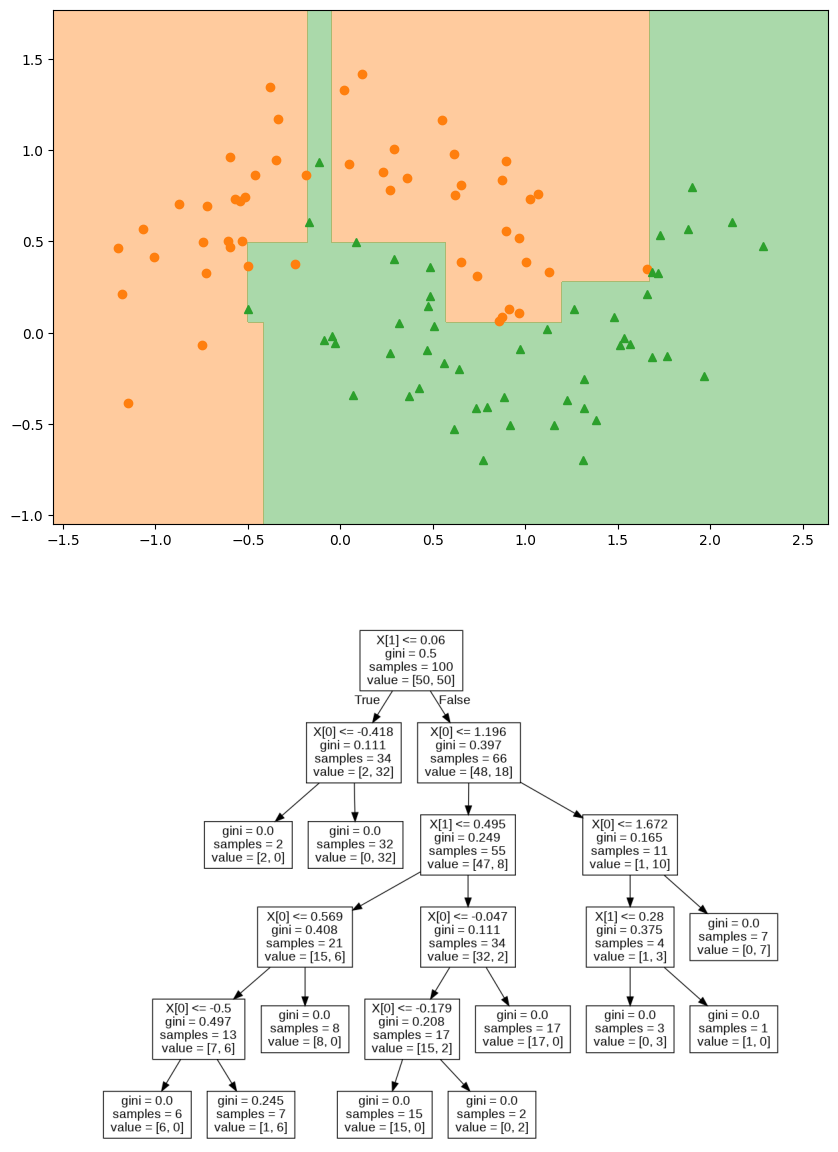

In [ ]:
#----------------------------------#
# 깊이 5로 fit
tree = DecisionTreeClassifier(max_depth=5, random_state=0).fit(X,y)
#----------------------------------#

# 그림으로 확인 
eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps # x축 (특성1)
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps # y축 (특성2)
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
X1, X2 = np.meshgrid(xx, yy) # 격자
X_grid = np.c_[X1.ravel(), X2.ravel()] # 열 합치기

Z = tree.predict(X_grid) # 예측값
Z = Z.reshape(X1.shape)

fig, ax = plt.subplots(figsize=(10,15), nrows=2, ncols=1, dpi=100)

ax[0].plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
ax[0].plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')
ax[0].contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])

ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)

#----------------------------------------------#
# 트리 그림 그리기
dot_data = export_graphviz(tree, out_file=None,
                           max_depth=9, impurity=True)
graph = graphviz.Source(dot_data, format='png')
tree_img = imread(graph.render())
ax[1].imshow(tree_img)
ax[1].axis('off')
#----------------------------------------------#

plt.show()

# 오버피팅 발생!!!!!!!!

### 규제



*   과대적합을 막기 위한 인자
    - `max_depth`: 최대 깊이
    - `max_leaf_nodes`: 최대 잎노드
    - `min_samples_leaf`: 잎노드에 포함될 최소 샘플 개수



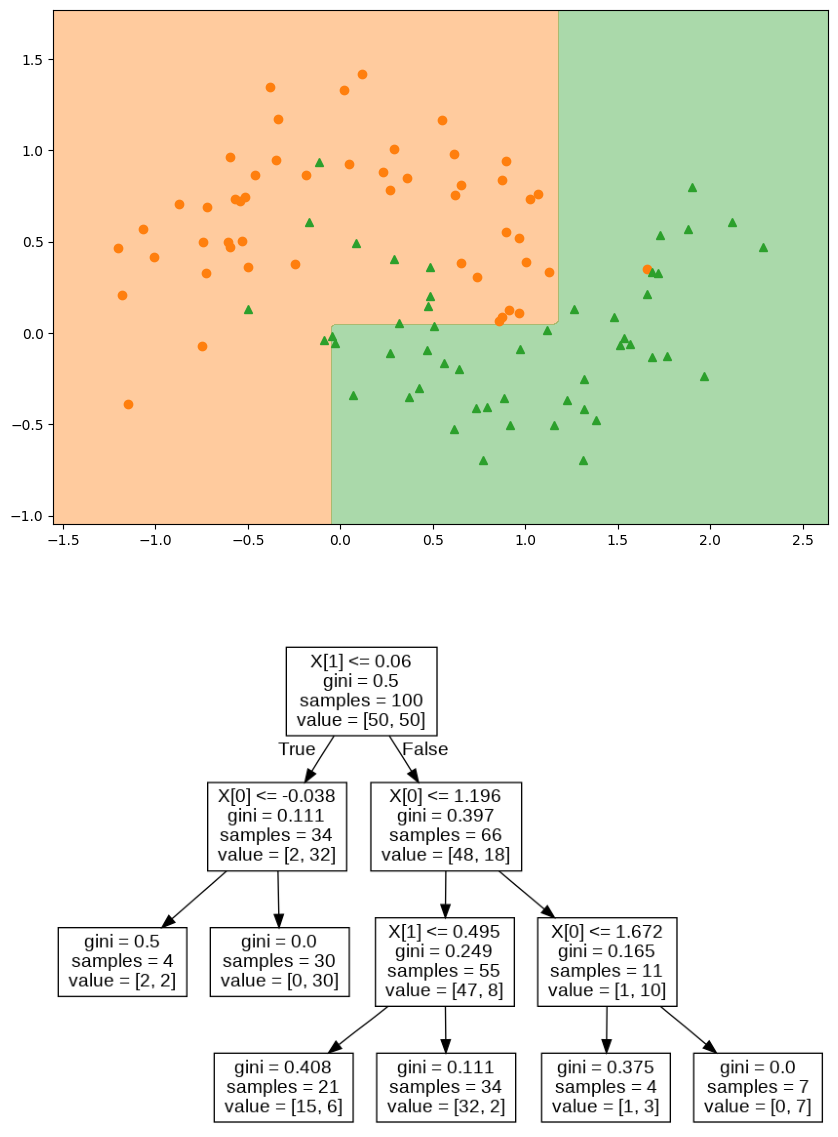

In [ ]:
#----------------------------------#
# min_samples_leaf 사용한 규제
tree = DecisionTreeClassifier(max_depth=3, random_state=0, min_samples_leaf=4).fit(X,y)
#----------------------------------#

# 그림으로 확인 
eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps # x축 (특성1)
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps # y축 (특성2)
xx = np.linspace(x_min, x_max, 100)
yy = np.linspace(y_min, y_max, 100)
X1, X2 = np.meshgrid(xx, yy) # 격자
X_grid = np.c_[X1.ravel(), X2.ravel()] # 열 합치기

Z = tree.predict(X_grid) # 예측값
Z = Z.reshape(X1.shape)

fig, ax = plt.subplots(figsize=(10,15), nrows=2, ncols=1, dpi=100)

ax[0].plot(X[y==0][:, 0], X[y==0][:, 1], 'o', color='C1')
ax[0].plot(X[y==1][:, 0], X[y==1][:, 1], '^', color='C2')
ax[0].contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])

ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)

#----------------------------------------------#
# 트리 그림 그리기
dot_data = export_graphviz(tree, out_file=None,
                           max_depth=9, impurity=True)
graph = graphviz.Source(dot_data, format='png')
tree_img = imread(graph.render())
ax[1].imshow(tree_img)
ax[1].axis('off')
#----------------------------------------------#

plt.show()

## 회귀

### 데이터 생성

In [ ]:
# 2차식으로 만든 데이터셋+잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4*(X-0.5)**2
y = y+np.random.randn(m,1)/10

### 데이터 확인

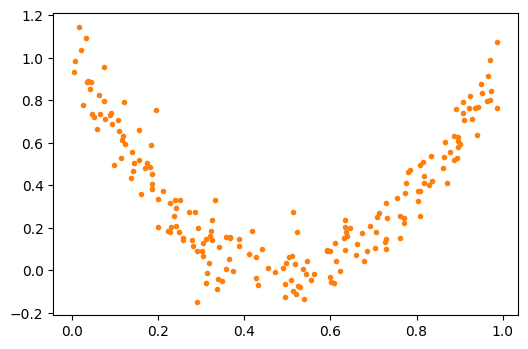

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X,y,'.',color='C1')

plt.show()

분류와 달리 회귀는 이차원평면에 그려졌어도 특성이 하나임. 왜냐하면 x축이 특성이고 y축은 타겟이기 때문임.

### 학습

In [ ]:
# 모델 로딩
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# 모델 생성과 fit
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=1)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=1, random_state=42)

In [ ]:
# 분기점 확인
tree_reg.tree_.threshold
# 노드 별로 threshold 출력
# 첫 번째 쪼개지는 지점은 0.19734927
# 그 뒤에 -2 어쩌구 부터는 걍 더이상 쪼개지는 값이 없어서 멋대로 출력된 것

array([ 0.19734927, -2.        , -2.        ])

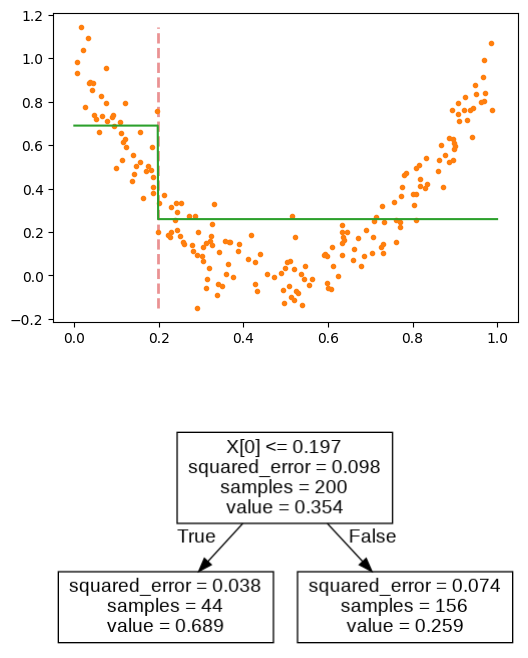

In [ ]:
# plot

x = np.linspace(0, 1, 1000)
y_pred = tree_reg.predict(x.reshape(-1,1)) # (1000,)

fig, ax = plt.subplots(figsize=(6,9), nrows=2, ncols=1, dpi=100)

ax[0].plot(X, y, '.', color = 'C1')
ax[0].plot(x, y_pred, color = 'C2')

#----------------------------------------------#
# 결정경계 그리기
for thr in tree_reg.tree_.threshold:
    if X.min() < thr < X.max() :
        ax[0].vlines(thr, ymin=y.min(), ymax=y.max(),
                      ls='--', color='C3', lw=2, alpha=0.5)
#----------------------------------------------#


# tree 그리기
dot_data = export_graphviz(tree_reg, out_file=None,
                           max_depth=9, impurity=True)
graph = graphviz.Source(dot_data, format="png")
tree_img = imread(graph.render())
ax[1].imshow(tree_img)
ax[1].axis('off')

plt.show()

### MSE

- 특정 node의 MSE

$$
\text{MSE}_{\text{node}} = \frac{1}{m_{\text{node}}} \sum_{i \in \text{node}} \left( \bar{y}_{\text{node}} - y^{(i)} \right)^2
$$

- $\bar{y}_{\text{node}}$는 해당 노드의 평균 타겟값, $y^{(i)}$는 해당 노드에 있는 $i$번째 샘플의 타겟값

$$
\bar{y}_{\text{node}} = \frac{1}{m_{\text{node}}} \sum_{i \in \text{node}} y^{(i)}
$$



In [ ]:
# mse 기준 작성
def mse(k, tk, X, y):
    """
    k: 특성의 인덱스
    tk: k번째 특성을 나눌 임계값
    X, y: left, right로 나눌 데이터와 타겟값
    """

    # split X w.r.t tk
    cond = X[:, k] <= tk
    X_left, y_left = X[cond], y[cond]
    X_right, y_right = X[~cond], y[~cond]

    # calc. mse left node, right node
    mse_left = np.mean( (y_left - y_left.mean())**2 ) # mean { (y-y평균)^2 }
    mse_right = np.mean( (y_right - y_right.mean())**2 )

    return mse_left, mse_right

In [ ]:
# 위 그림처럼 되는지 확인
MSE_left, MSE_right = mse(0, 0.197, X, y)

print(f"Left node squared error = {MSE_left:.3f}")
print(f"Right node squared error = {MSE_right:.3f}")

Left node squared error = 0.038
Right node squared error = 0.074


### Value

- 특정 node의 value

$$
\text{value}_{\text{node}} = \frac{1}{m_{\text{node}}} \sum_{i \in \text{node}}  y^{(i)} 
$$

- 그 node에 있는 샘플의 타겟값 평균

In [ ]:
# 위 그림 노드의 value확인
print(f"Left node value = {y[ X[:,0]<=0.197 ].mean():.3f}") # X의 첫 번째 특성
print(f"Right node value = {y[ X[:,0]>0.197 ].mean():.3f}") # X의 첫 번째 특성

Left node value = 0.689
Right node value = 0.259


### 목적함수

- 평균제곱오차를 기준으로 다음 함수의 값이 가장 작아지는 위치에서 분기

$$
J(k, t_k) = \frac{m_{\text{left}}}{m} MSE_{\text{left}} + \frac{m_{\text{right}}}{m} MSE_{\text{right}}
$$

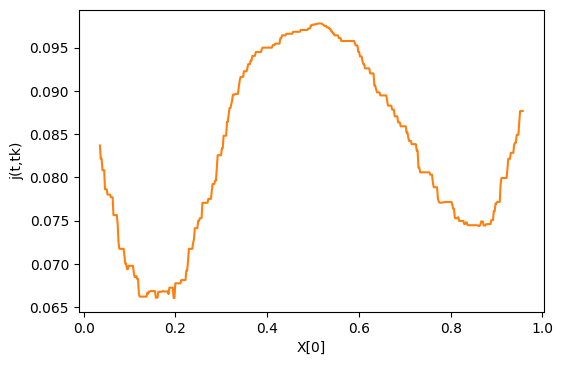

In [ ]:
# 목적함수 그리기
eps = 0.03
T = np.linspace(X.min()+eps, X.max()-eps, 500)
crit=[]

for t in T:
    crit.append(J(0, t, mse, X, y)) # mse사용

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(T, crit, color='C1')
    
ax.set_xlabel('X[0]')
ax.set_ylabel('j(t,tk)')

plt.show()

X[0]일 때 0부터 1까지 값을 바꿔가며 트리를 쭉 쪼개보면 0.2부근에서 목적함수가 min

In [ ]:
# 깊이 3으로 fit

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=42)

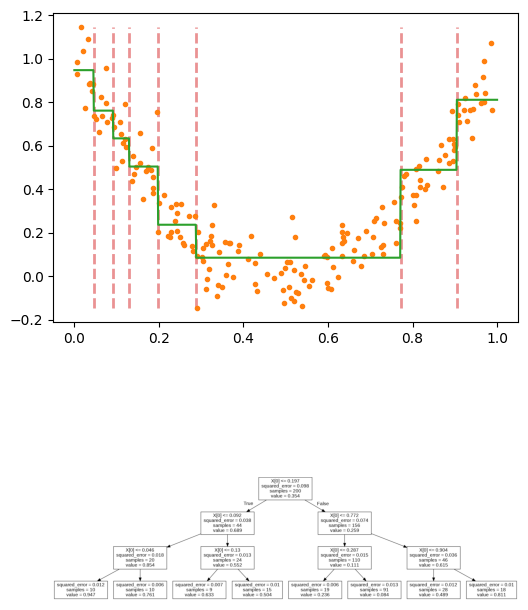

In [ ]:
# plot

x = np.linspace(0, 1, 1000)
y_pred = tree_reg.predict(x.reshape(-1,1)) # (1000,)

fig, ax = plt.subplots(figsize=(6,9), nrows=2, ncols=1, dpi=100)

ax[0].plot(X, y, '.', color = 'C1')
ax[0].plot(x, y_pred, color = 'C2')

#----------------------------------------------#
# 결정경계 그리기
for thr in tree_reg.tree_.threshold:
    if X.min() < thr < X.max() :
        ax[0].vlines(thr, ymin=y.min(), ymax=y.max(),
                      ls='--', color='C3', lw=2, alpha=0.5)
#----------------------------------------------#


# tree 그리기
dot_data = export_graphviz(tree_reg, out_file=None,
                           max_depth=9, impurity=True)
graph = graphviz.Source(dot_data, format="png")
tree_img = imread(graph.render())
ax[1].imshow(tree_img)
ax[1].axis('off')

plt.show()

리프노드가 8개라 그래프에도 출력값이 계단 형식으로 8개 출력됨 (y축)

### 규제

- 과대적합을 막기 위한 인자 `max_depth`, `max_leaf_nodes`, `min_samples_leaf`

In [ ]:
# tree_reg2에 규제를 걸어 결과를 일반화 하기, max_leaf_nodes
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_leaf_nodes=10) # 규제

In [ ]:
# fit
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=42)

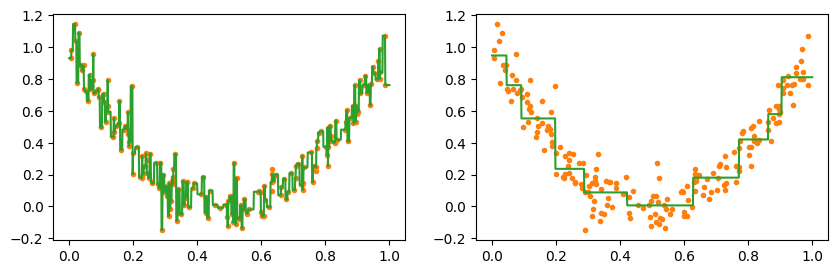

In [ ]:
# plot

x = np.linspace(0,1,1000)
y_pred1 = tree_reg1.predict(x.reshape(-1,1))
y_pred2 = tree_reg2.predict(x.reshape(-1,1))

fig, ax = plt.subplots(figsize=(10,3), nrows=1, ncols=2, dpi=100)

ax[0].plot(X, y, '.', color='C1')
ax[0].plot(x, y_pred1, color='C2')

ax[1].plot(X, y, '.', color='C1')
ax[1].plot(x, y_pred2, color='C2')

plt.show()


규제를 걸지 않으면 모든 점에 대해 구별함. 즉, 샘플마다 다 구별을 해버림 => Overfitting!!!!!

## [+] 실제 데이터에 적용

### 분류: 유방암 데이터

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66
)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [ ]:
model = DecisionTreeClassifier(random_state=66)
tree = model.fit(X_train,y_train)

print(f"학습 세트 정확도: {tree.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {tree.score(X_test, y_test):.3f}")

학습 세트 정확도: 1.000
테스트 세트 정확도: 0.916


In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=66).fit(X_train, y_train)

print(f"학습 세트 정확도: {tree.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도: {tree.score(X_test, y_test):.3f}")

학습 세트 정확도: 0.991
테스트 세트 정확도: 0.916


#### 스케일링

*   feature들 사이에 단위가 다를 경우 단위를 통일해야 함. 즉, 데이터가 0~1 사이 값을 갖도록 정규화 혹은 표준화 해야함. (일반적으로 텍스트 데이터는 둘 다 사용하며, 이미지 데이터는 정규화가 잘 맞는다고 알려져 있음)
그런데 tree에서는 스케일링을 하나마나 똑같음. 왜냐하면 rank처럼 plot 상에서 그냥 데이터의 위치만 찾아서 쪼개는 것이기 때문에 실질적 값보단 데이터의 위치만 중요함!
타겟이 얼마나 노드에 균일하게 모여있느냐를 보는 것이기 때문에 스케일링 필요없음!!!

In [ ]:
# 모델 로딩
from sklearn.preprocessing import MinMaxScaler

# fit & transform
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeClassifier(max_depth=4, random_state=66).fit(X_train_scaled, y_train)

print(f"학습 세트 정확도: {tree.score(X_train_scaled, y_train):.3f}")
print(f"테스트 세트 정확도: {tree.score(X_test_scaled, y_test):.3f}")

# 스케일링 효과가 없기 때문에 윗 셀이랑 결과값이 똑같음

학습 세트 정확도: 0.991
테스트 세트 정확도: 0.916


### 회귀: 램 가격

1. 램 가격 데이터를 2000년까지 데이터만 사용하여 tree로 모델링 하기
2. 같은 데이터를 선형회귀로 모델링하고 2000년 이후 데이터에서 두 모델이 어떤 결과를 만드는지 비교하기

In [ ]:
pd.read_csv("ram_price.csv")

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


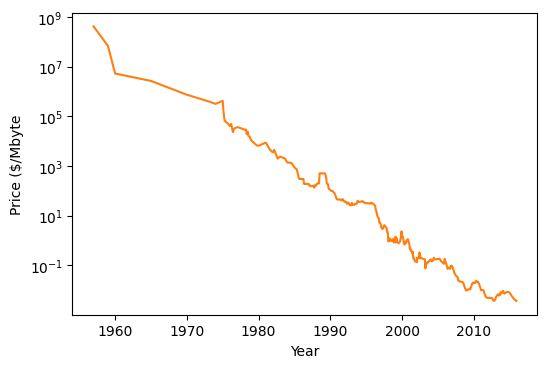

In [ ]:
data = pd.read_csv("ram_price.csv")

fig = plt.figure(dpi=100)
ax = plt.axes()

# 로그 스케일링
ax.plot(data['date'], data['price'], color='C1')
ax.semilogy() # y축 로그변환
ax.set_xlabel("Year")
ax.set_ylabel("Price ($/Mbyte")

plt.show()

In [ ]:
# train set 분리
cond = data['date'] <= 2000

X_train = data.loc[cond, 'date'].to_numpy().reshape(-1,1) # 판다스에서 loc이용해서 행렬로 접근
y_train = np.log(data.loc[cond, 'price']).to_numpy()

In [ ]:
# 선형회귀 모델과 트리 모델로 회귀 해보기
from sklearn.linear_model import LinearRegression

In [ ]:
# fit
lin_reg = LinearRegression().fit(X_train, y_train)
tree_reg = DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train, y_train)

In [ ]:
# predict
x = data['date'].to_numpy().reshape(-1,1)

y_lin = lin_reg.predict(x)
y_tree = tree_reg.predict(x)

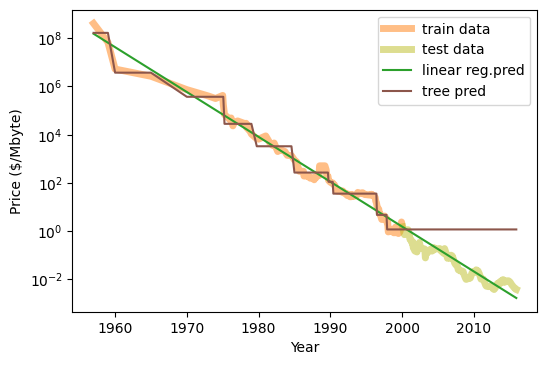

In [ ]:
fig = plt.figure(dpi = 100)
ax = plt.axes()

# real data
ax.semilogy(data.loc[cond, 'date'], data.loc[cond,'price'], color = 'C1', lw=5, alpha = 0.5, label = 'train data')
ax.semilogy(data.loc[~cond, 'date'], data.loc[~cond,'price'], color = 'C8', lw=5, alpha = 0.5, label = 'test data')

#-------------------------------------#
# 예측 결과 그래프 두개 그리기
ax.semilogy(data.date, np.exp(y_lin), color='C2', label='linear reg.pred')
ax.semilogy(data.date, np.exp(y_tree), color='C5', label='tree pred')
# 로그 취한 값을 학습데이터로 사용했으니 exp
#-------------------------------------#

ax.set_xlabel("Year")
ax.set_ylabel("Price ($/Mbyte)")
ax.legend()

plt.show()

1998년 이상부터는 마지막 노드값을 계속 출력함 => 트리 모델의 한계

즉, 외삽에 대해 예측을 못함!

## 장단점

- 장점
    - 빠른 속도
    - 모델을 시각화하여 비전문가도 결과 과정을 이해하기 쉬움
    - 데이터 정규화, 표준화 같은 전처리 필요없음
- 단점
    - 쉬운 과대적합
    - 학습데이터를 벗어나는 영역에서 예측 불가능